In [1]:
import pandas as pd
import numpy as np
import datetime as datetime


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movie_budgets = pd.read_csv('unzippedData/tn.movie_budgets.csv')


movie_budgets 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [3]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].map(lambda x: int(x[1:].replace(",","")))

In [4]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].map(lambda x: int(x[1:].replace(",","")))

In [5]:
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].map(lambda x: int(x[1:].replace(",","")))

In [6]:
movie_budgets["domestic_profit"] = movie_budgets["domestic_gross"] - movie_budgets["production_budget"]

In [7]:
movie_budgets["worldwide_profit"] = movie_budgets["worldwide_gross"] - movie_budgets["production_budget"]

In [8]:
movie_budgets["domestic_roi"] = movie_budgets["domestic_profit"]/movie_budgets['production_budget']

In [9]:
movie_budgets["worldwide_roi"] = movie_budgets["worldwide_profit"]/movie_budgets["production_budget"]

In [10]:
movie_budgets.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5782.0,5.037236e+01,2.882108e+01,1.0,2.500000e+01,5.000000e+01,7.500000e+01,1.000000e+02
production_budget,5782.0,3.158776e+07,4.181208e+07,1100.0,5.000000e+06,1.700000e+07,4.000000e+07,4.250000e+08
domestic_gross,5782.0,4.187333e+07,6.824060e+07,0.0,1.429534e+06,1.722594e+07,5.234866e+07,9.366622e+08
worldwide_gross,5782.0,9.148746e+07,1.747200e+08,0.0,4.125415e+06,2.798445e+07,9.764584e+07,2.776345e+09
domestic_profit,5782.0,1.028557e+07,4.992137e+07,-307237650.0,-9.132757e+06,-3.487755e+05,1.778144e+07,6.306622e+08
worldwide_profit,5782.0,5.989970e+07,1.460889e+08,-200237650.0,-2.189071e+06,8.550286e+06,6.096850e+07,2.351345e+09
domestic_roi,5782.0,1.983540e+00,2.608659e+01,-1.0,-7.943671e-01,-1.216738e-01,1.058148e+00,1.799000e+03
worldwide_roi,5782.0,3.800161e+00,2.953028e+01,-1.0,-5.077044e-01,7.083098e-01,2.758346e+00,1.799000e+03


Text(0, 0.5, 'Worldwide ROI')

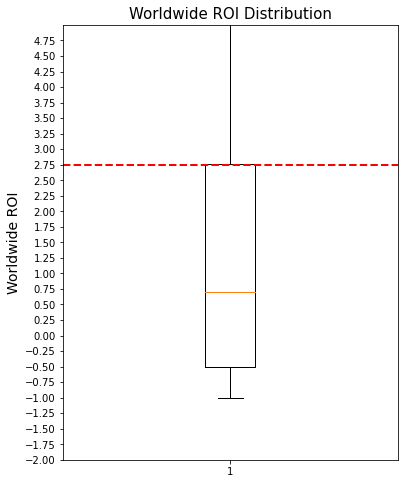

In [11]:
x = movie_budgets['worldwide_roi'].values 
fig, ax = plt.subplots(figsize = (6,8))
ax.boxplot(x)
ax.set_ylim(-2,5)
ynew = 2.75

ticks = np.arange(-2,5,0.25)
ax.set_yticks(ticks)
ax.axhline(ynew , color = 'r', linestyle = "--", linewidth = "2") 
# plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
ax.set_title('Worldwide ROI Distribution', fontsize = 15)

ax.set_ylabel('Worldwide ROI', fontsize = 14)





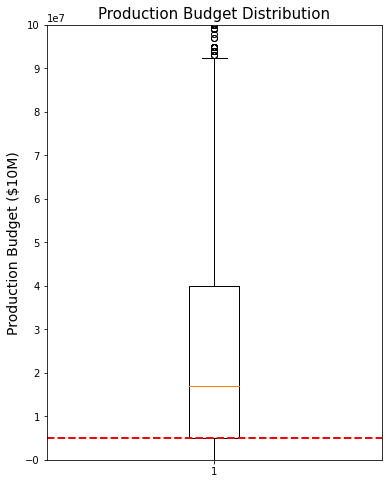

In [12]:
y = movie_budgets['production_budget'].values 
fig, ax2 = plt.subplots(figsize = (6,8))
ax2.boxplot(y)
ax2.set_ylim(-10000,100000000)
ynew = 5000000

ticks = np.arange(-10000,100000000,10000000)
ax2.set_yticks(ticks)
ax2.axhline(ynew , color = 'r', linestyle = "--", linewidth = "2") 
# plt.rc('xtick', labelsize=10) 
# plt.rc('ytick', labelsize=10)

ax2.set_title('Production Budget Distribution', fontsize = 15)


ax2.set_ylabel('Production Budget ($10M)', fontsize = 14);



<AxesSubplot:>

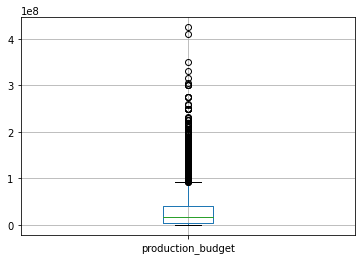

In [13]:
movie_budgets.boxplot(column='production_budget')

In [14]:
top_movie_list = list(movie_budgets[(movie_budgets['worldwide_roi']>=5) 
             & ((movie_budgets['production_budget']>=5000000)
             & (movie_budgets['worldwide_gross']>=2))]['movie'])
top_movie_list





['Avatar',
 'Star Wars Ep. VII: The Force Awakens',
 'Avengers: Infinity War',
 'The Avengers',
 'Jurassic World',
 'Black Panther',
 'Titanic',
 'Incredibles 2',
 'Iron Man 3',
 'Furious 7',
 'Captain Marvel',
 'Jurassic World: Fallen Kingdom',
 'Beauty and the Beast',
 'Aquaman',
 'Frozen',
 'Zootopia',
 'Harry Potter and the Order of the Phoenix',
 'The Twilight Saga: Breaking Dawn, Part 2',
 'The Hunger Games: Catching Fire',
 'Harry Potter and the Prisoner of Azkaban',
 'Harry Potter and the Deathly Hallows: Part II',
 'The Hunger Games: Mockingjay - Part 1',
 'Harry Potter and the Sorcererâ\x80\x99s Stone',
 'Harry Potter and the Deathly Hallows: Part I',
 'The Da Vinci Code',
 'Venom',
 'Star Wars Ep. I: The Phantom Menace',
 'Star Wars Ep. III: Revenge of the Sith',
 'Deadpool 2',
 'Gravity',
 'The Lord of the Rings: The Fellowship of the Ring',
 'The Martian',
 'Harry Potter and the Chamber of Secrets',
 'Ice Age: Continental Drift',
 'Finding Nemo',
 'The Lord of the Rings: T

In [15]:
movie_budgets['release_year'] = movie_budgets['release_date'].map(lambda x: int(x[-4:]))

movie_budgets['release_month_abr'] = movie_budgets['release_date'].map(lambda x: x[:3])
movie_budgets['release_month_num'] = movie_budgets['release_month_abr'].map(lambda x: datetime.datetime.strptime(x, "%b").month)
movie_budgets['release_month_num']

0       12
1        5
2        6
3        5
4       12
        ..
5777    12
5778     4
5779     7
5780     9
5781     8
Name: release_month_num, Length: 5782, dtype: int64

In [16]:
movie_budgets.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5782.0,5.037236e+01,2.882108e+01,1.0,2.500000e+01,5.000000e+01,7.500000e+01,1.000000e+02
production_budget,5782.0,3.158776e+07,4.181208e+07,1100.0,5.000000e+06,1.700000e+07,4.000000e+07,4.250000e+08
domestic_gross,5782.0,4.187333e+07,6.824060e+07,0.0,1.429534e+06,1.722594e+07,5.234866e+07,9.366622e+08
worldwide_gross,5782.0,9.148746e+07,1.747200e+08,0.0,4.125415e+06,2.798445e+07,9.764584e+07,2.776345e+09
domestic_profit,5782.0,1.028557e+07,4.992137e+07,-307237650.0,-9.132757e+06,-3.487755e+05,1.778144e+07,6.306622e+08
worldwide_profit,5782.0,5.989970e+07,1.460889e+08,-200237650.0,-2.189071e+06,8.550286e+06,6.096850e+07,2.351345e+09
domestic_roi,5782.0,1.983540e+00,2.608659e+01,-1.0,-7.943671e-01,-1.216738e-01,1.058148e+00,1.799000e+03
worldwide_roi,5782.0,3.800161e+00,2.953028e+01,-1.0,-5.077044e-01,7.083098e-01,2.758346e+00,1.799000e+03
release_year,5782.0,2.003967e+03,1.272439e+01,1915.0,2.000000e+03,2.007000e+03,2.012000e+03,2.020000e+03
release_month_num,5782.0,7.050675e+00,3.480147e+00,1.0,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01


In [17]:
movie_budgets['production_budget'].describe()

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [18]:
movie_budgets['worldwide_roi'].describe()

count    5782.000000
mean        3.800161
std        29.530282
min        -1.000000
25%        -0.507704
50%         0.708310
75%         2.758346
max      1799.000000
Name: worldwide_roi, dtype: float64

In [19]:
movie_budgets["production_budget"].min()

1100

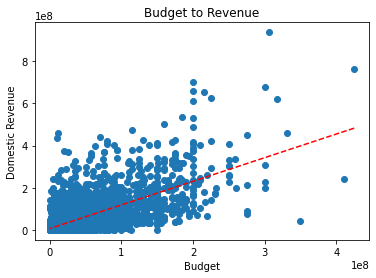

In [20]:
# scatterplot to show relationship between Revenue and Budget
# expectation: linear relationship, but by what mulitplier?

x=movie_budgets['production_budget']
y1=movie_budgets['domestic_gross']
fig, ax1 = plt.subplots()
ax1.scatter(x, y1)
# plt.xlim(-1, 10)   
ax1.set_xlabel('Budget')
ax1.set_ylabel('Domestic Revenue')
ax1.set_title('Budget to Revenue');


z = np.polyfit(x, y1, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(x,p(x),"r--") #plot trendline


# results: 

results: At a high level, there is an overall negative relationship b.w ROI and Budget and as budget increases, there is an exponential decrease in ROI.
Next steps would be to find the 'sweet spot' budget where there is a healthy ROI. A good budget is one that is not too low since ROI is 'unstable' there, meaning it overall has a very exponentially negative slope, and too cases where there is a low ROI. If we were to draw a line underneat the High level view scatter plot, we see that it's kind of positive as revenue increases, this explains our theory of the cases where ROI can actually be lower in some cases which budget is super high.


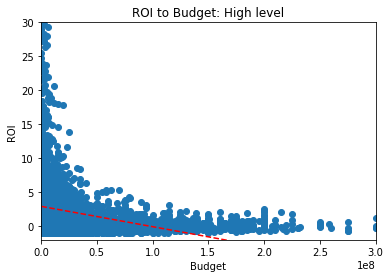

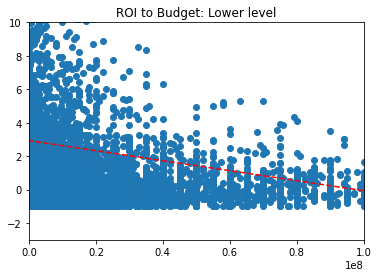

In [21]:
# 2 scatterplots to show relationship between: 1) ROI and revenue  and 2) ROI and Budget
# expectation: scatterplots, will look similar given linear relationship b.w budget and revenue, 
#     but probably at different slope



# Higher level scatterplot to show relationship between ROI and Budget  
fig, ax = plt.subplots()
x=movie_budgets["production_budget"]
y=movie_budgets['domestic_roi']
ax.scatter(x, y)
ax.set_title('ROI to Budget: High level');
ax.set_xlabel('Budget')
ax.set_ylabel('ROI')

plt.xlim(-1, 300000000) #high level
plt.ylim(-2, 30) #high level

z = np.polyfit(x, y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(x,p(x),"r--") #plot trendline



# Lower level scatterplot to show relationship between ROI and Budget  
fig, ax1 = plt.subplots()
ax1.scatter(x, y)
ax1.set_title('ROI to Budget: Lower level');
plt.xlim(-1, 100000000) #lower level
plt.ylim(-3, 10) #lower level

z = np.polyfit(x, y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(x,p(x),"r--") #plot trendline



print("results: At a high level, there is an overall negative relationship b.w ROI and Budget and as budget increases, there is an exponential decrease in ROI.")
print("Next steps would be to find the 'sweet spot' budget where there is a healthy ROI. A good budget is one that is not too low since ROI is 'unstable' there, meaning it overall has a very exponentially negative slope, and too cases where there is a low ROI. If we were to draw a line underneat the High level view scatter plot, we see that it's kind of positive as revenue increases, this explains our theory of the cases where ROI can actually be lower in some cases which budget is super high.")


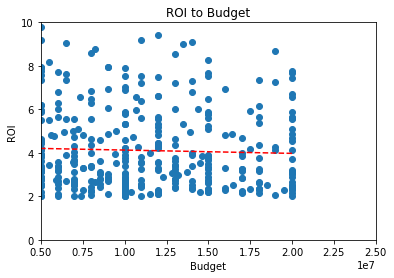

In [22]:
# TESTING: different intervals of budget to see if there is any positive slope in ROI
mb1 = movie_budgets[(movie_budgets['domestic_roi']>=2)
               & (movie_budgets['domestic_roi']<=10)
        & (movie_budgets['production_budget']>=5000000)
               & (movie_budgets['production_budget']<=20000000)]
fig, ax = plt.subplots()
x1=mb1['production_budget']
y=mb1['domestic_roi']
ax.scatter(x1, y)
ax.set_title('ROI to Budget');
ax.set_xlabel('Budget')
ax.set_ylabel('ROI')
plt.xlim(5000000, 25000000) #high level
plt.ylim(0, 10) #high level
z = np.polyfit(x1, y, 1) #create trendline
p = np.poly1d(z)
plt.plot(x1,p(x1),"r--") #plot trendline

results: there is more positive linear relationship b.w ROI and Revenue. But oddly enough, the high-level view of the scatterplot looks like a less intense version of the ROI/Budget, but positively tilted.


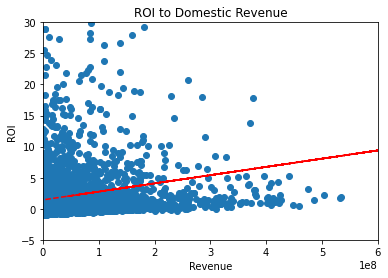

In [23]:
# scatterplot to show relationship between ROI and Revenue 
x1=movie_budgets["domestic_gross"]
y=movie_budgets["domestic_roi"]
fig, ax1 = plt.subplots()
ax1.scatter(x1, y)
plt.xlim(-1, 600000000)
plt.ylim(-5, 30)
ax1.set_xlabel('Revenue')
ax1.set_ylabel('ROI')
ax1.set_title('ROI to Domestic Revenue');

z = np.polyfit(x1, y, 1)
p = np.poly1d(z)
plt.plot(x1,p(x1),"r--")

# print(movie_budgets[movie_budgets['domestic_roi']==4.5])['domestic_gross'].mean()
print("results: there is more positive linear relationship b.w ROI and Revenue. But oddly enough, the high-level view of the scatterplot looks like a less intense version of the ROI/Budget, but positively tilted.")




In [24]:
# lineplot of month and ROI 

monthly_movie= movie_budgets.groupby('release_month_num')['movie'].count()
monthly_droi= movie_budgets.groupby('release_month_num')['domestic_roi'].mean()
monthly_budget= movie_budgets.groupby('release_month_num')['production_budget'].mean()
monthly_wroi= movie_budgets.groupby('release_month_num')['worldwide_roi'].mean()


monthly_droi = pd.Series.to_frame(monthly_droi)
monthly_movie = pd.Series.to_frame(monthly_movie) 
monthly_budget = pd.Series.to_frame(monthly_budget) 
monthly_wroi = pd.Series.to_frame(monthly_wroi) 


monthly_stats1 = monthly_droi.join(monthly_movie, rsuffix=0)
monthly_stats2 = monthly_stats1.join(monthly_budget, rsuffix=0)
monthly_stats3 = monthly_stats2.join(monthly_wroi, rsuffix=0)

monthly_stats3 = monthly_stats3.reset_index()
monthly_stats3.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_month_num  12 non-null     int64  
 1   domestic_roi       12 non-null     float64
 2   movie              12 non-null     int64  
 3   production_budget  12 non-null     float64
 4   worldwide_roi      12 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 608.0 bytes


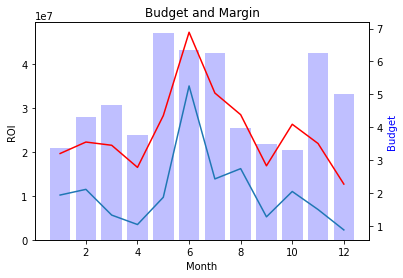

In [25]:
# import calendar as c
# month_number=5
# c.month_abbr[month_number]

x1= monthly_stats3["release_month_num"]
y1=monthly_stats3["domestic_roi"]
y2=monthly_stats3["worldwide_roi"]
y3=monthly_stats3['production_budget']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
# ax3 = ax2.twinx()

ax1.bar(x1, y3, alpha = .25, color='blue')


line1, = ax2.plot(x1, y1)
line2, = ax2.plot(x1, y2, color='red')

ax1.set_xlabel('Month')
ax1.set_ylabel('ROI')
ax2.set_ylabel('Budget', color='b')

 



ax1.set_title('Budget and Margin');


In [26]:
top_movies = movie_budgets[(movie_budgets['worldwide_gross'] > 0) 
                              & (movie_budgets['production_budget'] >= 5000000) 
                              & (movie_budgets['worldwide_roi'] >= 2.75) 
                              & (movie_budgets['domestic_roi'] >= 1) 
                              & (movie_budgets['release_year'] < 2020)]
top_movies




,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,release_year,release_month_abr,release_month_num
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220,2.060988,5.710167,2015,Dec,12
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,1.262718,5.827114,2018,Apr,4
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,398279547,1292935897,1.770131,5.746382,2012,May,5
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,437270625,1433854864,2.033817,6.669092,2015,Jun,6
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,500059566,1148258224,2.500298,5.741291,2018,Feb,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,4,"Jun 9, 2017",It Comes at Night,5000000,13985117,19720203,8985117,14720203,1.797023,2.944041,2017,Jun,6
4304,5,"Mar 15, 2002",Y Tu MamÃ¡ TambiÃ©n,5000000,13649881,33649881,8649881,28649881,1.729976,5.729976,2002,Mar,3
4305,6,"Sep 24, 2004",Shaun of the Dead,5000000,13542874,30332385,8542874,25332385,1.708575,5.066477,2004,Sep,9
4311,12,"Mar 3, 2017",Before I Fall,5000000,12241072,18945682,7241072,13945682,1.448214,2.789136,2017,Mar,3


In [27]:
# lineplot of month and ROI 

monthly_top_movie= top_movies.groupby('release_month_num')['movie'].count()
monthly_top_droi= top_movies.groupby('release_month_num')['domestic_roi'].mean()
monthly_top_budget= top_movies.groupby('release_month_num')['production_budget'].mean()
monthly_top_wroi= top_movies.groupby('release_month_num')['worldwide_roi'].mean()

monthly_top_droi = pd.Series.to_frame(monthly_top_droi)
monthly_top_movie = pd.Series.to_frame(monthly_top_movie) 
monthly_top_budget = pd.Series.to_frame(monthly_top_budget) 
monthly_top_wroi = pd.Series.to_frame(monthly_top_wroi) 


monthly_top_stats1 = monthly_top_droi.join(monthly_top_movie, rsuffix=0)
monthly_top_stats2 = monthly_top_stats1.join(monthly_top_budget, rsuffix=0)
top_movies_month = monthly_top_stats2.join(monthly_top_wroi, rsuffix=0)

top_movies_month = top_movies_month.reset_index()
top_movies_month 


,release_month_num,domestic_roi,movie,production_budget,worldwide_roi
0,1,3.613247,45,1.530889e+07,7.187499
1,2,3.896533,59,2.602712e+07,6.531677
2,3,3.768023,63,2.935079e+07,7.124758
3,4,4.519145,34,2.844118e+07,8.048194
4,5,4.472478,54,5.079635e+07,9.222615
5,6,4.649156,90,4.160889e+07,9.265867
6,7,3.617786,68,3.930441e+07,7.720248
7,8,3.683140,55,2.102732e+07,6.859137
8,9,4.194985,48,1.771042e+07,7.795637
9,10,4.824035,65,2.017769e+07,9.851593


In [28]:
merged_monthly_df = monthly_stats3.merge(top_movies_month, on ='release_month_num' )

# monthly_stats3
merged_monthly_df

,release_month_num,domestic_roi_x,movie_x,production_budget_x,worldwide_roi_x,domestic_roi_y,movie_y,production_budget_y,worldwide_roi_y
0,1,1.935052,347,2.084349e+07,3.198986,3.613247,45,1.530889e+07,7.187499
1,2,2.107934,392,2.804642e+07,3.547812,3.896533,59,2.602712e+07,6.531677
2,3,1.324664,470,3.078208e+07,3.449646,3.768023,63,2.935079e+07,7.124758
3,4,1.037507,454,2.380283e+07,2.776726,4.519145,34,2.844118e+07,8.048194
4,5,1.866915,407,4.713520e+07,4.351029,4.472478,54,5.079635e+07,9.222615
5,6,5.255122,479,4.309912e+07,6.889714,4.649156,90,4.160889e+07,9.265867
6,7,2.425521,440,4.254616e+07,5.040113,3.617786,68,3.930441e+07,7.720248
7,8,2.738651,496,2.555609e+07,4.380376,3.683140,55,2.102732e+07,6.859137
8,9,1.271824,493,2.181290e+07,2.824510,4.194985,48,1.771042e+07,7.795637
9,10,2.043329,573,2.039266e+07,4.089145,4.824035,65,2.017769e+07,9.851593


<ipython-input-29-fb62c732d029>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months)


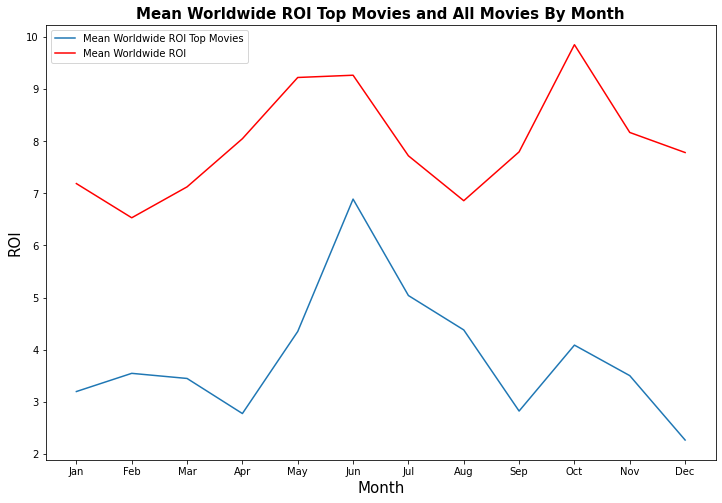

In [29]:
fig, ax = plt.subplots(figsize = (12, 8))
x = merged_monthly_df['release_month_num']
# h = top_movies_month['movie']
y1 = merged_monthly_df['worldwide_roi_x']
y2 = merged_monthly_df['worldwide_roi_y']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# ax = ax1.twinx()
# ax1.bar(x, h, alpha = 0.25, color=['blue', 'blue', 'blue', 'blue', 'green', 'green', 'blue', 'blue', 'blue','green', 'blue', 'blue'])
line1, = ax.plot(x, y1)
line2, = ax.plot(x, y2, color='red')
ax.set_title('Mean Worldwide ROI Top Movies and All Movies By Month', {'fontsize':15, 'fontweight':'bold'})
ax.set_xlabel('Month', fontsize = 15)
ax.set_xticklabels(months)
# ax1.set_ylabel('Movie Count', fontsize = 15)
ax.set_xticks(list(range(1,13)))
ax.set_ylabel('ROI', fontsize = 15)
ax.legend([line1, line2],['Mean Worldwide ROI Top Movies', 'Mean Worldwide ROI'], loc='upper left')
# plt.rc('xtick', labelsize=10) 
# plt.rc('ytick', labelsize=10)






In [30]:
reviews = pd.read_csv('unzippedData/rt.reviews.tsv', sep='\t',encoding = "ISO-8859-1")
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [31]:
movie_gross = pd.read_csv('unzippedData/bom.movie_gross.csv')
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [32]:
name = pd.read_csv("unzippedData/imdb.name.basics.csv")
title_akas  = pd.read_csv("unzippedData/imdb.title.akas.csv")
tmdb_movies  = pd.read_csv("unzippedData/tmdb.movies.csv")
title_basics  = pd.read_csv("unzippedData/imdb.title.basics.csv")
title_principals  = pd.read_csv("unzippedData/imdb.title.principals.csv")



In [33]:
# Filtered data saved to txt file
top_movie_list = list(movie_budgets[(movie_budgets['worldwide_roi']>=5) 
             & ((movie_budgets['production_budget']>=5000000)
             & (movie_budgets['worldwide_gross']>=2))]['movie'])
top_movie_list

['Avatar',
 'Star Wars Ep. VII: The Force Awakens',
 'Avengers: Infinity War',
 'The Avengers',
 'Jurassic World',
 'Black Panther',
 'Titanic',
 'Incredibles 2',
 'Iron Man 3',
 'Furious 7',
 'Captain Marvel',
 'Jurassic World: Fallen Kingdom',
 'Beauty and the Beast',
 'Aquaman',
 'Frozen',
 'Zootopia',
 'Harry Potter and the Order of the Phoenix',
 'The Twilight Saga: Breaking Dawn, Part 2',
 'The Hunger Games: Catching Fire',
 'Harry Potter and the Prisoner of Azkaban',
 'Harry Potter and the Deathly Hallows: Part II',
 'The Hunger Games: Mockingjay - Part 1',
 'Harry Potter and the Sorcererâ\x80\x99s Stone',
 'Harry Potter and the Deathly Hallows: Part I',
 'The Da Vinci Code',
 'Venom',
 'Star Wars Ep. I: The Phantom Menace',
 'Star Wars Ep. III: Revenge of the Sith',
 'Deadpool 2',
 'Gravity',
 'The Lord of the Rings: The Fellowship of the Ring',
 'The Martian',
 'Harry Potter and the Chamber of Secrets',
 'Ice Age: Continental Drift',
 'Finding Nemo',
 'The Lord of the Rings: T

In [34]:
# filtered data based on previous above analysis 
with open('top_movie_list.txt', 'w') as f:
    for item in top_movie_list:
        f.write("%s\n" % item)
        

In [35]:
title_basics  = pd.read_csv("unzippedData/imdb.title.basics.csv")
# title_principals  = pd.read_csv("unzippedData/imdb.title.principals.csv")
ratings = pd.read_csv('imdb.title.ratings.csv.gz')

In [36]:
movie_budgets['release_year'] = movie_budgets['release_date'].map(lambda x: int(x[-4:]))


In [37]:
movies_info = title_basics.merge(ratings, how='left', on='tconst')
movies_info.rename({'primary_title' : 'movie', 
                    'start_year' : 'release_year'}, axis =1, inplace= True)
movies_info['release_year'] = movies_info['release_year'].astype(int)


In [38]:
movie_budgets_cleaned = movie_budgets[(movie_budgets['worldwide_roi']>=5) 
             & ((movie_budgets['production_budget']>=5000000)
             & (movie_budgets['worldwide_gross']>=2))
              & (movie_budgets['release_year'] != 2020) 
                & (movie_budgets['release_year'] >= 2010)]

In [39]:
movies_df = movie_budgets_cleaned.merge(movies_info, how='left', on =['movie','release_year'])
movies_df.dropna( inplace=True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 1 to 192
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 156 non-null    int64  
 1   release_date       156 non-null    object 
 2   movie              156 non-null    object 
 3   production_budget  156 non-null    int64  
 4   domestic_gross     156 non-null    int64  
 5   worldwide_gross    156 non-null    int64  
 6   domestic_profit    156 non-null    int64  
 7   worldwide_profit   156 non-null    int64  
 8   domestic_roi       156 non-null    float64
 9   worldwide_roi      156 non-null    float64
 10  release_year       156 non-null    int64  
 11  release_month_abr  156 non-null    object 
 12  release_month_num  156 non-null    int64  
 13  tconst             156 non-null    object 
 14  original_title     156 non-null    object 
 15  runtime_minutes    156 non-null    float64
 16  genres             156 non

In [40]:
movies_df['averagerating'].shape

(156,)

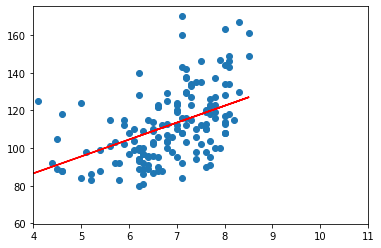

In [41]:
#linear regresssion dabbling // setup

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression


X = movies_df['averagerating'].values.reshape(-1, 1)   
Y = movies_df['runtime_minutes'].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.xlim(4, 11)
# plt.ylim(0, 12)
plt.plot(X, Y_pred, color='red')
plt.show()

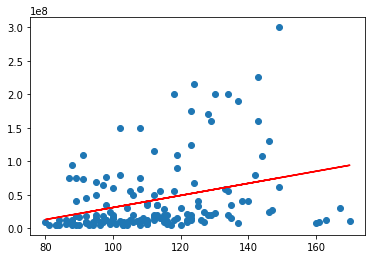

In [42]:
#linear regresssion dabbling // setup

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression


X = movies_df['runtime_minutes'].values.reshape(-1, 1)   
Y = movies_df['production_budget'].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
# plt.xlim(0, 12)
# plt.ylim(0, 12)
plt.plot(X, Y_pred, color='red')
plt.show()

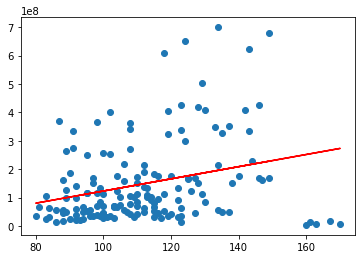

In [43]:
# linear regresssion dabbling // setup

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression


X = movies_df['runtime_minutes'].values.reshape(-1, 1)   
Y = movies_df['domestic_gross'].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
# plt.xlim(0, 12)
# plt.ylim(0, 12)
plt.plot(X, Y_pred, color='red')
plt.show()

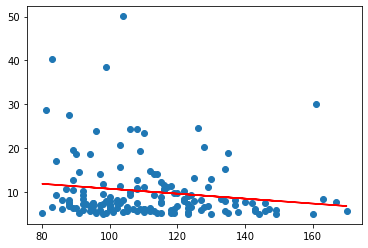

In [44]:
# linear regresssion dabbling // setup

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression


X = movies_df['runtime_minutes'].values.reshape(-1, 1)   
Y = movies_df['worldwide_roi'].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
# plt.xlim(0, 12)
# plt.ylim(0, 12)
plt.plot(X, Y_pred, color='red')
plt.show()

In [45]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 1 to 192
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 156 non-null    int64  
 1   release_date       156 non-null    object 
 2   movie              156 non-null    object 
 3   production_budget  156 non-null    int64  
 4   domestic_gross     156 non-null    int64  
 5   worldwide_gross    156 non-null    int64  
 6   domestic_profit    156 non-null    int64  
 7   worldwide_profit   156 non-null    int64  
 8   domestic_roi       156 non-null    float64
 9   worldwide_roi      156 non-null    float64
 10  release_year       156 non-null    int64  
 11  release_month_abr  156 non-null    object 
 12  release_month_num  156 non-null    int64  
 13  tconst             156 non-null    object 
 14  original_title     156 non-null    object 
 15  runtime_minutes    156 non-null    float64
 16  genres             156 non

In [46]:
# turn multi-valued genre cells into multi-row, single-valued
movies_df_columns = list(movies_df.columns)
movies_df_columns.remove('genres')
movies_df_columns

movies_df.dropna(subset=['genres'], inplace=True)
movies_df['genres'] = movies_df['genres'].map(lambda x: x.split(","))

movies_df = movies_df.genres.apply(pd.Series) \
    .merge(movies_df, right_index = True, left_index = True) \
    .drop(["genres"], axis = 1) \
    .melt(id_vars = movies_df_columns , value_name = "genres") \
    .dropna()
movies_df['genres'].value_counts()


Drama          74
Comedy         54
Action         38
Thriller       37
Horror         34
Adventure      32
Mystery        30
Sci-Fi         23
Romance        23
Biography      16
Animation      14
Crime          12
Fantasy         8
Music           7
Family          6
History         4
Sport           2
Musical         2
Documentary     2
Western         1
Name: genres, dtype: int64

In [65]:
genres = ['Drama','Comedy', 'Action' , 'Thriller', 'Horror', 'Adventure', 'Mystery', 'Sci-Fi', 'Romance', 'Biography',      
'Animation', 'Crime']
heatmap_cat = movies_df.groupby(['release_month_num','genres'])['movie'].count()
# heatmap_cat.sort_values(by = 'movie', ascending = False)
heatmap_cat = pd.Series.to_frame(heatmap_cat)
heatmap_cat.reset_index(inplace=True)
heatmap_cat_max = heatmap_cat.groupby(['release_month_num'])['movie'].max() 


heatmap_cat_max

release_month_num
1      5
2      8
3      5
4      3
5      8
6      9
7     11
8      5
9      4
10    11
11    17
12     9
Name: movie, dtype: int64

In [60]:
# pd.qcut(movies_df,len(movies_df.dropna()),duplicates='drop')
movies_df['wroi_bucketed']= pd.qcut(movies_df['worldwide_roi'], q=5, precision=0)
movies_df['wrev_bucketed']= pd.qcut(movies_df['worldwide_gross'], q=5, precision=0)
movies_df['pb_bucketed']= pd.qcut(movies_df['production_budget'], q=5, precision=0)

# movies_df['wroi_bucketed'].value_counts()

In [ ]:
heatmap_df = movies_df.groupby(['wroi_bucketed','wrev'])['movie'].count()
heatmap_df = pd.Series.to_frame(heatmap_df)
heatmap_df.reset_index(inplace=True)
heatmap_df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a = list(heatmap_df['wroi_bucketed'])
b = list(heatmap_df['wrev'])
c = list(heatmap_df['movie'])


data = pd.DataFrame({'X': a, 'Y': b, 'Z': c})
data_pivoted = data.pivot("X", "Y", "Z")
ax = sns.heatmap(data_pivoted)
plt.show()

In [ ]:
movie_budgets['wroi_bucketed']= pd.qcut(movie_budgets['worldwide_roi'], q=8, precision=0)
movie_budgets['wrev']= pd.qcut(movie_budgets['worldwide_gross'], q=8, precision=0)


In [ ]:
heatmap_df_all = movies_df.groupby(['wroi_bucketed','wrev'])['movie'].count()
heatmap_df_all = pd.Series.to_frame(heatmap_df_all)
heatmap_df_all.reset_index(inplace=True)
heatmap_df_all

In [ ]:
a = list(heatmap_df_all['wroi_bucketed'])
b = list(heatmap_df_all['wrev'])
c = list(heatmap_df_all['movie'])

In [ ]:

a = list(heatmap_df_all['wroi_bucketed'])
b = list(heatmap_df_all['wrev'])
c = list(heatmap_df_all['movie'])


data = pd.DataFrame({'X': a, 'Y': b, 'Z': c})
data_pivoted = data.pivot("X", "Y", "Z")
ax = sns.heatmap(data_pivoted)
plt.show()

In [ ]:
a = list(heatmap_df_all['wroi_bucketed'].unique())
a

In [ ]:
budget_buckets = ([4999999, 25000000, 50000000, 75000000, 100000000, 200000000, 300000000, 400000000])
movie_budgets['budget_buckets'] = pd.cut(movie_budgets['production_budget'], budget_buckets)
movie_budgets['budget_buckets']

In [ ]:
budget_buckets

In [ ]:
heatmap_df_all = movies_df.groupby(['wroi_bucketed','wrev','budget_buckets'])['movie'].count()
heatmap_df_all = pd.Series.to_frame(heatmap_df_all)
heatmap_df_all.reset_index(inplace=True)
heatmap_df_all

In [ ]:
movies_df['genres'].value_counts()

In [ ]:
a = list(heatmap_df_all['wroi_bucketed'])
b = budget_buckets
c = list(heatmap_df_all['movie'])


data = pd.DataFrame({'X': a, 'Y': b, 'Z': c})
data_pivoted = data.pivot("X", "Y", "Z")
ax = sns.heatmap(data_pivoted)
plt.show()